In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
basic data exploration like shape, null value, data type

In [2]:
data = pd.read_csv('dataset/StudentsPerformance.csv')
data.sample(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
196,male,group C,some high school,free/reduced,completed,59,69,65
693,female,group D,associate's degree,standard,none,77,77,73
457,male,group D,associate's degree,free/reduced,none,53,54,48
504,female,group D,master's degree,free/reduced,none,40,59,54
419,male,group E,high school,free/reduced,completed,57,56,54
232,female,group B,bachelor's degree,standard,none,67,86,83
370,male,group E,some college,standard,none,84,77,71


In [3]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
data = data.rename(columns={'race/ethnicity':'ethinic', 'parental level of education':'parent_education','test preparation course':'preparation'})

In [7]:
print(data['math score'].isnull().sum())

0


In [10]:
data['result'] = ((data['math score'] + data['reading score'] + data['writing score']) /300) * 100

In [11]:
data['result'] = data['result'].apply(lambda x: 1 if x > 50 else 0)
data.sample(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
640,male,group D,high school,standard,none,41,52,51,0
207,male,group E,high school,standard,completed,81,80,76,1
568,male,group B,high school,free/reduced,none,63,48,47,1
227,male,group D,high school,standard,none,57,50,54,1
416,male,group C,bachelor's degree,standard,completed,71,74,68,1
545,male,group E,some high school,free/reduced,completed,78,83,80,1


# Data Visualization

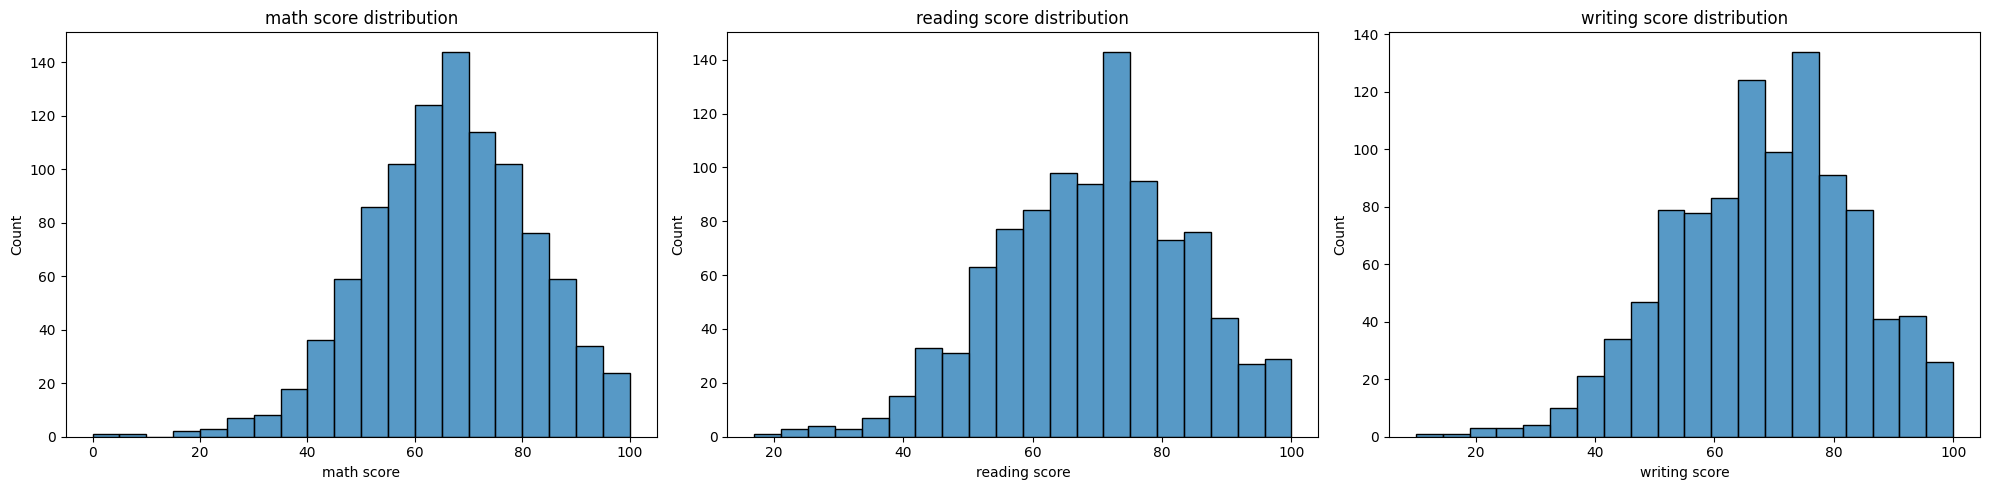

In [6]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

# math score
sns.histplot(data['math score'], bins=20, ax=axes[0])
axes[0].set_title('math score distribution')

# reading score distribution
sns.histplot(data['reading score'], bins=20, ax=axes[1])
axes[1].set_title('reading score distribution')


sns.histplot(data['writing score'], bins=20, ax=axes[2])
axes[2].set_title('writing score distribution')

plt.tight_layout()
plt.show()

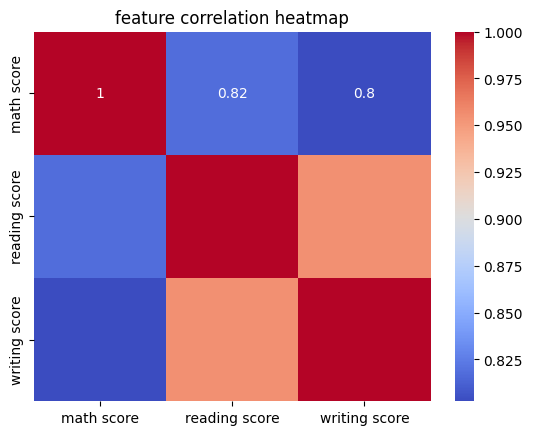

In [12]:
# correlation of each score col

corr = data[['math score','reading score','writing score']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('feature correlation heatmap')
plt.show()

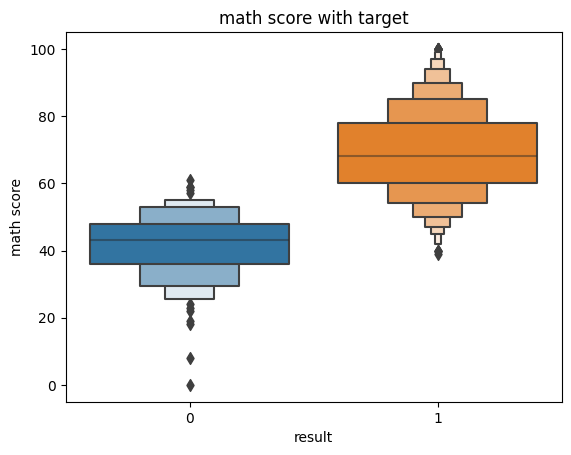

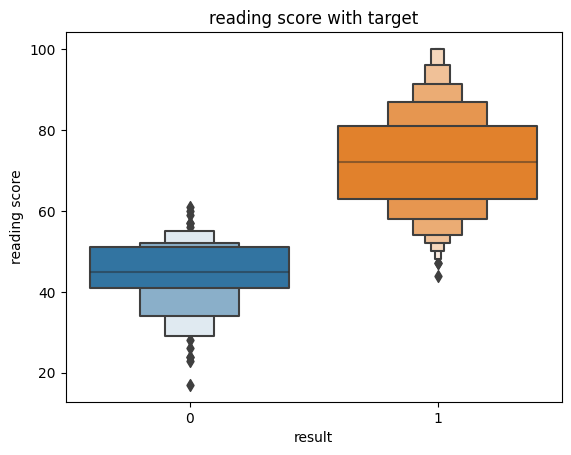

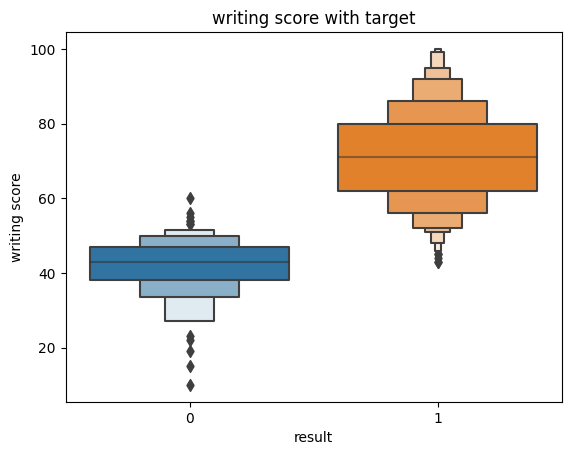

In [15]:
# relationship with targetvalue(pass/fail)

sns.boxenplot(x='result', y ='math score', data=data)
plt.title('math score with target')
plt.show()

sns.boxenplot(x='result', y ='reading score', data=data)
plt.title('reading score with target')
plt.show()

sns.boxenplot(x='result', y ='writing score', data=data)
plt.title('writing score with target')
plt.show()



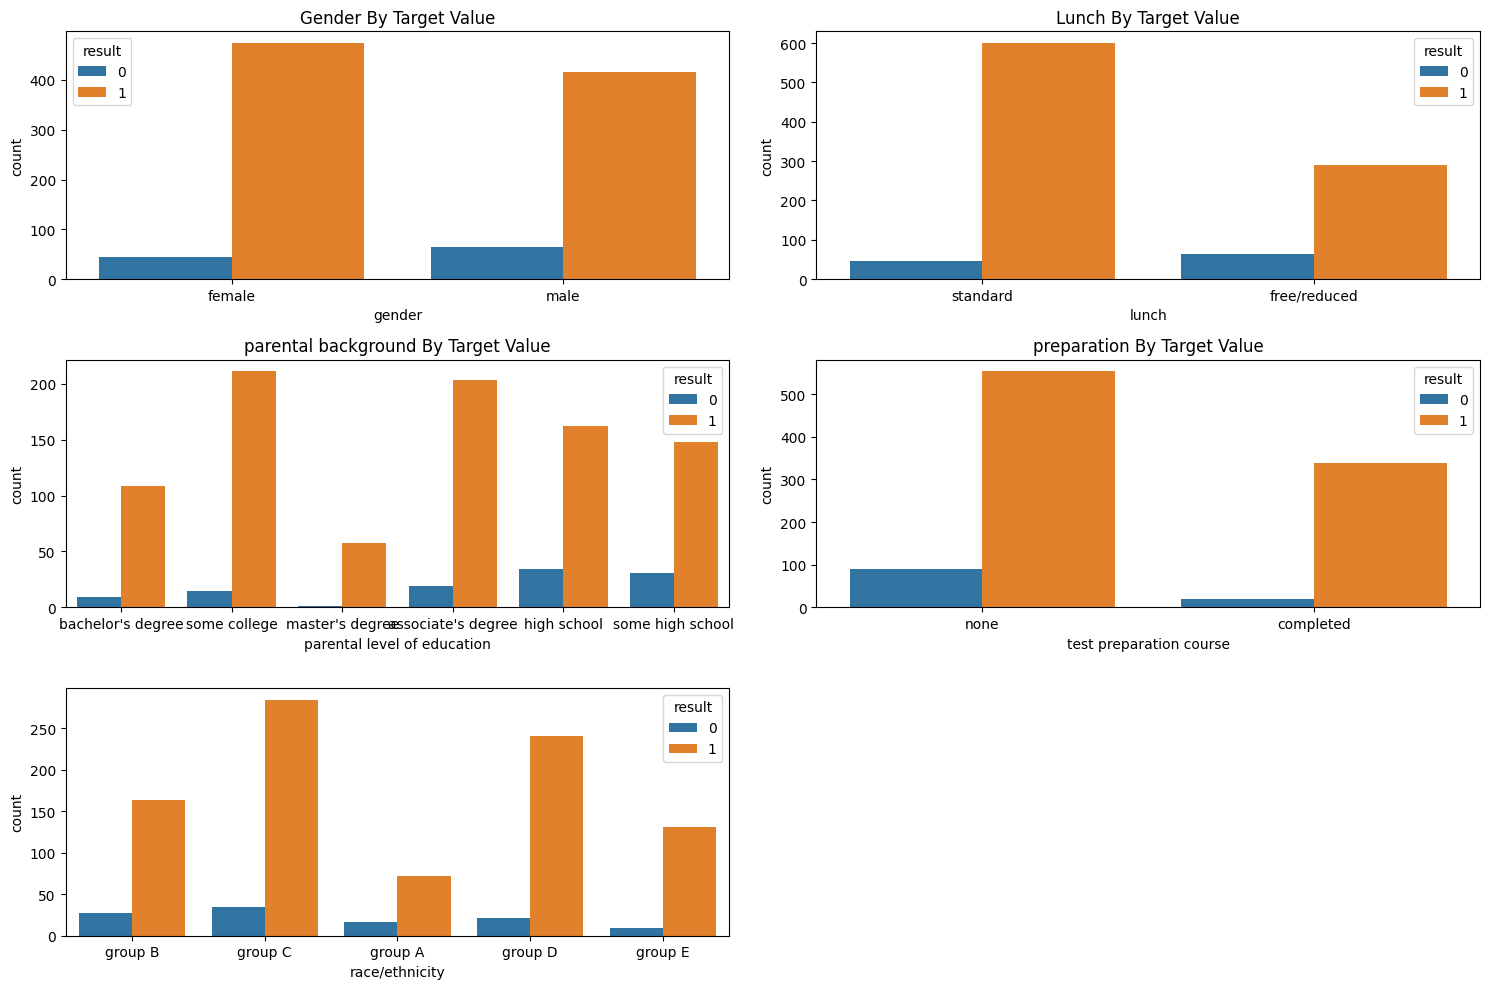

In [34]:
fig, axes = plt.subplots(3,2, figsize=(15,10))

# for gender
sns.countplot(x='gender', hue='result', data=data, ax=axes[0, 0])
axes[0,0].set_title('Gender By Target Value')

# for Lunch
sns.countplot(x='lunch', hue='result',data=data, ax=axes[0,1])
axes[0,1].set_title('Lunch By Target Value')

# for parental background
sns.countplot(x='parental level of education', hue='result',data=data, ax=axes[1,0])
axes[1,0].set_title('parental background By Target Value')

# for ethinic
sns.countplot(x='test preparation course', hue='result',data=data, ax=axes[1,1])
axes[1,1].set_title('preparation By Target Value')

# 
sns.countplot(x='race/ethnicity', hue='result',data=data, ax=axes[2,0])
axes[1,1].set_title('preparation By Target Value')

fig.delaxes(axes[2,1])
plt.tight_layout()
plt.show()

# Data Preprocessing
encode catagorical data

In [39]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [42]:
data = pd.get_dummies(data, columns=[
    'gender',
    'ethinic',
    'parent_education',
    'lunch',
    'preparation'
], drop_first=True)

KeyError: "['ethinic', 'parent_education', 'preparation'] not in index"

In [ ]:
final_data = data.rename(columns={'gender_male':'gender', 'ethinic_group B':'group_B','ethinic_group C':'group_C','ethinic_group D':'group_D','ethinic_group E':'group_E','preparation_none':'preparation'})

In [38]:
final_data['result'].value_counts()

KeyError: 'result'

In [ ]:
final_data.sample(10)

,math score,reading score,writing score,result,gender,group_B,group_C,group_D,group_E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,preparation
233,92,87,78,1,1,0,0,0,1,0,0,0,0,1,1,1
38,75,90,88,1,0,0,0,1,0,0,0,0,0,0,0,0
251,71,83,83,1,0,0,0,1,0,0,0,0,1,0,0,1
258,70,75,78,1,0,1,0,0,0,0,0,0,1,0,1,1
458,100,100,100,1,0,0,0,0,1,1,0,0,0,0,1,1
201,65,81,77,1,0,0,0,1,0,0,0,0,1,0,0,1
706,46,34,36,0,1,0,0,1,0,0,1,0,0,0,1,1
464,75,58,62,1,1,0,0,0,0,1,0,0,0,0,1,0
387,57,78,67,1,0,0,1,0,0,0,0,0,0,0,0,1
788,68,65,61,1,1,0,1,0,0,0,0,0,0,0,0,1


# Imbalanced set of output
Well we get an imbalanced set of output from our data now model selection and training set needs to be assign carefully for training

In [ ]:
df_rename.to_csv('dataset/preprocessed_data.csv')

# Data Visualization